# **Spit some [tensor] flow**



In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


## The basic idea is that the CNNs learn things in a hierarchical manner

Thus, if we have a great classifier that can classify 10k objects with 99% accuracy, it must have great primary layers that learn the basic features perfectly. 

So we can use the primary layers for other things, like classifying 11k objects !


In [0]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import sys, os


In [0]:
from tensorflow.keras.applications.vgg16 import VGG16 as pretrained, preprocess_input

## Let's import the dataset


In [53]:
!wget --passive-ftp --prefer-family=ipv4 https://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz

--2020-06-12 14:18:45--  https://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60270631 (57M) [application/x-gzip]
Saving to: ‘17flowers.tgz.2’

17flowers.tgz.2     100%[===================>]  57.48M  22.1MB/s    in 2.6s    

2020-06-12 14:18:48 (22.1 MB/s) - ‘17flowers.tgz.2’ saved [60270631/60270631]



In [54]:
!ls

17flowers.tgz	 17flowers.tgz.2   jpg
17flowers.tgz.1  flower17_dataset  sample_data


In [55]:
!tar -xzvf 17flowers.tgz

jpg/files.txt
jpg/files.txt~
jpg/image_0001.jpg
jpg/image_0002.jpg
jpg/image_0003.jpg
jpg/image_0004.jpg
jpg/image_0005.jpg
jpg/image_0006.jpg
jpg/image_0007.jpg
jpg/image_0008.jpg
jpg/image_0009.jpg
jpg/image_0010.jpg
jpg/image_0011.jpg
jpg/image_0012.jpg
jpg/image_0013.jpg
jpg/image_0014.jpg
jpg/image_0015.jpg
jpg/image_0016.jpg
jpg/image_0017.jpg
jpg/image_0018.jpg
jpg/image_0019.jpg
jpg/image_0020.jpg
jpg/image_0021.jpg
jpg/image_0022.jpg
jpg/image_0023.jpg
jpg/image_0024.jpg
jpg/image_0025.jpg
jpg/image_0026.jpg
jpg/image_0027.jpg
jpg/image_0028.jpg
jpg/image_0029.jpg
jpg/image_0030.jpg
jpg/image_0031.jpg
jpg/image_0032.jpg
jpg/image_0033.jpg
jpg/image_0034.jpg
jpg/image_0035.jpg
jpg/image_0036.jpg
jpg/image_0037.jpg
jpg/image_0038.jpg
jpg/image_0039.jpg
jpg/image_0040.jpg
jpg/image_0041.jpg
jpg/image_0042.jpg
jpg/image_0043.jpg
jpg/image_0044.jpg
jpg/image_0045.jpg
jpg/image_0046.jpg
jpg/image_0047.jpg
jpg/image_0048.jpg
jpg/image_0049.jpg
jpg/image_0050.jpg
jpg/image_0051.jpg
jp

In [56]:
!ls jpg/ -1 | wc -l

1362


In [57]:
!find jpg/ -type f ! -name '*.jpg'

jpg/files.txt~
jpg/files.txt


In [0]:
!rm jpg/files.txt jpg/files.txt~

In [0]:
!find jpg/ -type f ! -name '*.jpg'

In [60]:
!ls jpg/ -1 | wc -l

1360


In [0]:
#Forming data directories:
import shutil
j = 1
total = 1360
for i  in range(1, total):
    fpath = f"jpg/image_{str(i).zfill(4)}.jpg"
    destPath = 'flower17_dataset/'+str(j)
    if not os.path.exists(destPath):
        os.makedirs(destPath)
    shutil.copy(fpath, destPath)

    if i%80==0:
        j+=1

In [62]:
!ls flower17_dataset

1  10  11  12  13  14  15  16  17  2  3  4  5  6  7  8	9


In [0]:
path = 'flower17_dataset'

In [0]:
IMAGE_SIZE = [200,200]
train_images = glob(path + '/*/*.jpg')

In [0]:
# Number of classes 
classes = glob(path + '/*')

In [66]:
classes

['flower17_dataset/8',
 'flower17_dataset/15',
 'flower17_dataset/2',
 'flower17_dataset/1',
 'flower17_dataset/9',
 'flower17_dataset/3',
 'flower17_dataset/6',
 'flower17_dataset/7',
 'flower17_dataset/14',
 'flower17_dataset/16',
 'flower17_dataset/11',
 'flower17_dataset/12',
 'flower17_dataset/4',
 'flower17_dataset/17',
 'flower17_dataset/13',
 'flower17_dataset/10',
 'flower17_dataset/5']

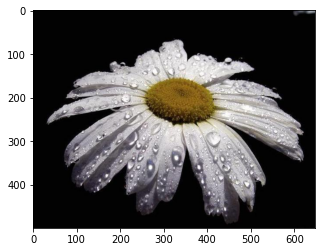

In [67]:
plt.imshow(image.load_img(np.random.choice(train_images)))
plt.show()

In [0]:
C = 3
pretrained_model = pretrained(input_shape = IMAGE_SIZE + [C],
                              weights = 'imagenet',
                              include_top = False)
pretrained_model.trainable = False

In [0]:
Y = len(classes)
h_layer = Flatten()(pretrained_model.output)
o_layer = Dense(Y, activation= 'softmax')(h_layer)

In [0]:
model = Model(pretrained_model.input, o_layer)

In [71]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0   

In [0]:
gen_object = ImageDataGenerator(rotation_range = 10,
                                width_shift_range = 0.1, 
                                height_shift_range = 0.1, 
                                zoom_range = 0.2,
                                horizontal_flip = True,
                                preprocessing_function = preprocess_input, 
                                validation_split=0.3)

In [73]:
len(train_images)

1359

In [74]:
n_trains = int(np.ceil(1359*0.7))
print(n_trains)

952


In [75]:
n_vals = int(np.floor(1359*0.3))
print(n_vals)

407


In [0]:
batch_size = 254

In [77]:
train_generator = gen_object.flow_from_directory(path, shuffle=True, target_size=IMAGE_SIZE, batch_size=batch_size, subset='training')
validation_generator = gen_object.flow_from_directory(path, target_size=IMAGE_SIZE, batch_size=batch_size, subset='validation')

Found 952 images belonging to 17 classes.
Found 407 images belonging to 17 classes.


In [0]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

In [79]:
report = model.fit_generator(train_generator, 
                             validation_data=validation_generator, 
                             epochs=10,
                             steps_per_epoch = int(np.ceil(n_trains/batch_size)),
                             validation_steps = int(np.ceil(n_vals/batch_size)))

Epoch 1/10
4/4 [==============================] - 23s 6s/step - loss: 13.5480 - accuracy: 0.2311 - val_loss: 7.4272 - val_accuracy: 0.5479
Epoch 2/10
4/4 [==============================] - 23s 6s/step - loss: 3.6265 - accuracy: 0.6891 - val_loss: 3.3243 - val_accuracy: 0.7568
Epoch 3/10
4/4 [==============================] - 23s 6s/step - loss: 1.6730 - accuracy: 0.8298 - val_loss: 2.3164 - val_accuracy: 0.8206
Epoch 4/10
4/4 [==============================] - 23s 6s/step - loss: 0.9638 - accuracy: 0.8813 - val_loss: 2.7476 - val_accuracy: 0.8157
Epoch 5/10
4/4 [==============================] - 23s 6s/step - loss: 0.6892 - accuracy: 0.9202 - val_loss: 2.3851 - val_accuracy: 0.8501
Epoch 6/10
4/4 [==============================] - 23s 6s/step - loss: 0.4375 - accuracy: 0.9412 - val_loss: 2.0139 - val_accuracy: 0.8698
Epoch 7/10
4/4 [==============================] - 23s 6s/step - loss: 0.2830 - accuracy: 0.9590 - val_loss: 2.3279 - val_accuracy: 0.8698
Epoch 8/10
4/4 [=================

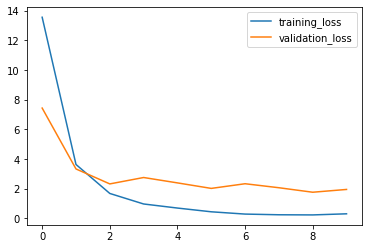

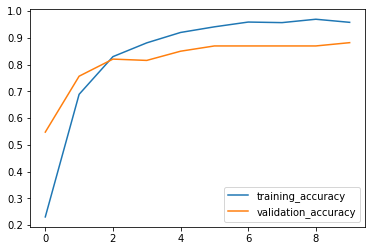

In [80]:
  plt.plot(report.history['loss'], label = 'training_loss')
  plt.plot(report.history['val_loss'], label = 'validation_loss')
  plt.legend()
  plt.show()
  plt.plot(report.history['accuracy'], label = 'training_accuracy')
  plt.plot(report.history['val_accuracy'], label = 'validation_accuracy')
  plt.legend()
  plt.show()

In [81]:
validation_generator[0][0][253].shape

(200, 200, 3)

In [82]:
validation_generator[0][1][253].shape

(17,)

In [0]:
y_pred = model.predict_generator(validation_generator, steps=np.ceil(n_vals/254))

In [0]:
y_pred = y_pred.argmax(axis=1)

In [0]:
y_test = validation_generator.classes

In [117]:
y_test.shape

(407,)

In [118]:
y_pred.shape

(407,)

In [0]:
import cv2
from google.colab.patches import cv2_imshow

Predicted = 4, Real = 3


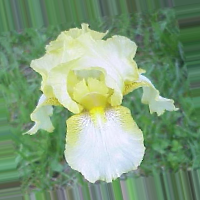

In [221]:
index = np.random.randint(0,407)
y_test_idx = y_test[index]
X_test_idx = validation_generator[0][0][index] 
y_pred_idx = y_pred[index]
print("Predicted = " + str(y_pred[index]) + ", Real = " + str(y_test[index]))
cv2_imshow((X_test_idx+(255/2)))
#plt.imshow((X_test_idx+(255/2))/255)
#plt.title("Predicted = " + str(y_pred[index]) + ", Real = " + str(y_test[index]))